### Name: Lalith Aditya
### Regd No: 22231
### MSC 1st Year
### Restaurant Price Prediction
### MDH campus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Getting Dataset
Download the datasets from
https://www.kaggle.com/c/restaurant-revenue-prediction/data

In [2]:
kdf = pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")

In [3]:
kdf.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


# 2. Preprocessing
Do the necessary data preprocessing steps if required

In [4]:
kdf['Open Date'] = kdf['Open Date'].str.replace('/', '')

In [5]:
for i in range(0,len(kdf.index)):
  kdf['Open Date'][i]=int(kdf['Open Date'][i][4:])

<ipython-input-5-a43817f7adab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdf['Open Date'][i]=int(kdf['Open Date'][i][4:])


In [6]:
kdf

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [7]:
from sklearn import preprocessing

In [8]:
label_encoder=preprocessing.LabelEncoder()
kdf['Type']=label_encoder.fit_transform(kdf['Type'])
kdf['City Group']=label_encoder.fit_transform(kdf['City Group'])
kdf['City']=label_encoder.fit_transform(kdf['City'])

In [9]:
kdf

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,29,1,1,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006,32,0,1,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006,18,1,1,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010,31,0,1,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [10]:
column_names = list(kdf.columns)

In [11]:
norm_columns=column_names[5:-1]

In [12]:
df = kdf

In [13]:
from sklearn.preprocessing import StandardScaler
kdf[norm_columns] = StandardScaler().fit_transform(kdf[norm_columns])

In [14]:
kdf

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,31,0,2,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,0.411513,0.302463,0.282950,2.281657,0.487922,0.575634,0.189821,1.615951,5653753.0
1,1,2008,3,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,6923131.0
2,2,2013,10,1,2,-0.694749,-0.270816,-2.253162,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2055379.0
3,3,2012,28,1,2,0.684680,0.060450,1.635760,1.607252,1.653422,...,2.606351,4.037064,2.874441,1.434362,2.872558,3.014054,2.912282,2.356945,2.736889,2675511.0
4,4,2009,14,1,2,-0.349892,-0.270816,-1.280931,-0.367578,-0.006056,...,-0.080631,0.411513,-0.269088,0.091048,0.508952,0.099286,0.575634,0.189821,1.055482,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,29,1,1,-0.694749,-0.933348,-1.280931,0.619837,1.653422,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,5787594.0
133,133,2006,32,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,9262754.0
134,134,2006,18,1,1,-0.349892,-0.270816,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2544857.0
135,135,2010,31,0,1,-0.005034,0.391716,-0.308701,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,7217634.0


In [15]:
# Checking for null values in the data frame
index = list(kdf.columns.values)
kdf.isnull().values.any()

False

That means all the values in the dataframe are not null! So we need not do any imputation

In [16]:
kdf.shape[1]

43

In [17]:
kdf

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,31,0,2,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,0.411513,0.302463,0.282950,2.281657,0.487922,0.575634,0.189821,1.615951,5653753.0
1,1,2008,3,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,6923131.0
2,2,2013,10,1,2,-0.694749,-0.270816,-2.253162,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2055379.0
3,3,2012,28,1,2,0.684680,0.060450,1.635760,1.607252,1.653422,...,2.606351,4.037064,2.874441,1.434362,2.872558,3.014054,2.912282,2.356945,2.736889,2675511.0
4,4,2009,14,1,2,-0.349892,-0.270816,-1.280931,-0.367578,-0.006056,...,-0.080631,0.411513,-0.269088,0.091048,0.508952,0.099286,0.575634,0.189821,1.055482,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,29,1,1,-0.694749,-0.933348,-1.280931,0.619837,1.653422,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,5787594.0
133,133,2006,32,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,9262754.0
134,134,2006,18,1,1,-0.349892,-0.270816,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2544857.0
135,135,2010,31,0,1,-0.005034,0.391716,-0.308701,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,7217634.0


# 3.Implement the all the 5 regression models separately on the data set

# 4. Computing the Mean Squared Error along with the regression models respectively


# Multiple Linear Regression

In [18]:
X = kdf.iloc[:, 0:-1].values
y = kdf.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predicting the Test Set Results

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([ 6763912.05537939,  7946119.21446782,  1859442.76335454,
       -4742413.09071785,  2415731.14428884,  6622109.55433136,
        1462382.98476636,  2427010.04003984, -2663520.80047828,
        5819189.9786514 ,  4580347.32513154,  4323467.95685679,
        2947871.68402845,  5955989.7772581 ,  5515348.04551852,
       -7042763.27649027,  6386132.53650689,  6099611.2568872 ,
         -68894.14915097,  5901219.90379447,  6727369.48292506,
        4096019.89273554,  9740896.95399177,  3536306.93042958,
        3232049.19706517,  3835613.44750971,  3604419.65383464,
        6383978.96306103,  4699189.72487581, 11271108.4133482 ,
        3373469.62809658,  3523326.01801008,  4410029.95501453,
        4159543.98310739,  4235486.72420222,  9100522.43739271,
        6724818.63317257, 21589432.20183498,  5248503.41787457,
        2036002.52470511,  4247708.37445074,  4353848.01415038,
        4713201.31877285,  5875343.40764552,  2312174.50071478,
        2342456.9521665 ])

In [22]:
y_test

array([ 2267425.,  4952497.,  3351383.,  3871344.,  2732645.,  7495092.,
        3956086.,  2156098.,  3752885.,  8904084.,  3600467.,  2097022.,
        4651866.,  5435276.,  5286212.,  4882985.,  4155435.,  4286645.,
        4467728.,  4250553.,  3164972.,  5337526.,  6782425.,  2371202.,
        3753720.,  7201784.,  4491607., 19696939.,  2383840.,  3745135.,
        2055379.,  3273041.,  4758476.,  8894598.,  3008199.,  6694797.,
        3347767.,  4136425.,  4264176.,  3570392.,  3199619.,  4807746.,
        1882131.,  2364478.,  1619683.,  3426169.])

In [23]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of MSE
  print(f"Mean Squared error is: {metrics.mean_squared_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [24]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 3021284.1935574994
Mean Squared error is: 21665646876021.977
Root Mean Square error is: 4654637.13687995
R2 score is: -1.7065684573670263


## Simple Linear Regression

In [25]:
kdf

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,31,0,2,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,0.411513,0.302463,0.282950,2.281657,0.487922,0.575634,0.189821,1.615951,5653753.0
1,1,2008,3,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,6923131.0
2,2,2013,10,1,2,-0.694749,-0.270816,-2.253162,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2055379.0
3,3,2012,28,1,2,0.684680,0.060450,1.635760,1.607252,1.653422,...,2.606351,4.037064,2.874441,1.434362,2.872558,3.014054,2.912282,2.356945,2.736889,2675511.0
4,4,2009,14,1,2,-0.349892,-0.270816,-1.280931,-0.367578,-0.006056,...,-0.080631,0.411513,-0.269088,0.091048,0.508952,0.099286,0.575634,0.189821,1.055482,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,29,1,1,-0.694749,-0.933348,-1.280931,0.619837,1.653422,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,5787594.0
133,133,2006,32,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,9262754.0
134,134,2006,18,1,1,-0.349892,-0.270816,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2544857.0
135,135,2010,31,0,1,-0.005034,0.391716,-0.308701,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,7217634.0


# 1.Taking city as the regressor

In [26]:
X = kdf.iloc[:, 2].values
y = kdf.iloc[:, -1].values

In [27]:
X

array([31,  3, 10, 28, 14,  3, 31, 31,  1, 11, 19, 31,  3, 31,  8, 31, 31,
       31, 32, 25, 12, 31, 18, 25, 31, 13,  3,  8, 31,  3, 25, 31, 33, 26,
       31,  0,  3,  3, 31, 31, 31, 31, 31,  3,  3,  4, 32, 32, 18, 31,  3,
       17, 30, 26, 23, 31, 31,  4, 31, 31,  3, 31, 25, 22, 31, 32, 20, 31,
       31, 20, 31, 31, 32,  3, 31, 31, 31,  3,  3,  0, 31, 31, 16, 31, 32,
       31,  8, 31,  4, 31, 31,  8, 31, 27, 26, 26, 10, 31,  9, 31, 31,  6,
       10, 27,  0,  5,  4, 26, 23,  3,  2, 21, 31, 27, 13, 31, 32,  3, 31,
       31,  5, 32, 31,  7,  3, 29, 15,  8,  3, 13, 24,  3, 29, 32, 18, 31,
       31])

In [28]:
y

array([ 5653753.,  6923131.,  2055379.,  2675511.,  4316715.,  5017319.,
        5166635.,  4491607.,  4952497.,  5444227.,  3745135.,  5161370.,
        1734634.,  4807746.,  1999097.,  3218918., 19696939.,  8213524.,
        5337526.,  2021934.,  5525735.,  1149870.,  3956086.,  2999068.,
        8904084.,  3778621.,  2267425.,  5435276.,  4705945.,  3447890.,
        3008199.,  2058644.,  3261924.,  2371202.,  4100886.,  3903884.,
        3028267.,  2740687.,  5461700.,  3818055.,  6836483.,  4554237.,
        4952255.,  2732645.,  4264176.,  3752885.,  4250758.,  7865428.,
        7201784.,  8630682.,  2156098.,  3273041.,  1763231.,  5595267.,
        4651866.,  6941173.,  2390534.,  3258837.,  3004429.,  3600467.,
        3164972.,  4350573.,  5286212.,  1619683.,  2551252.,  1756069.,
        1882131.,  4052733.,  3836721.,  3452382.,  3982767.,  4136425.,
        2525375.,  3347767.,  5500818., 16549064.,  4590423.,  1904842.,
        3871344.,  6313221.,  3727364.,  4066618., 

In [29]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[ 5653753.],
       [ 6923131.],
       [ 2055379.],
       [ 2675511.],
       [ 4316715.],
       [ 5017319.],
       [ 5166635.],
       [ 4491607.],
       [ 4952497.],
       [ 5444227.],
       [ 3745135.],
       [ 5161370.],
       [ 1734634.],
       [ 4807746.],
       [ 1999097.],
       [ 3218918.],
       [19696939.],
       [ 8213524.],
       [ 5337526.],
       [ 2021934.],
       [ 5525735.],
       [ 1149870.],
       [ 3956086.],
       [ 2999068.],
       [ 8904084.],
       [ 3778621.],
       [ 2267425.],
       [ 5435276.],
       [ 4705945.],
       [ 3447890.],
       [ 3008199.],
       [ 2058644.],
       [ 3261924.],
       [ 2371202.],
       [ 4100886.],
       [ 3903884.],
       [ 3028267.],
       [ 2740687.],
       [ 5461700.],
       [ 3818055.],
       [ 6836483.],
       [ 4554237.],
       [ 4952255.],
       [ 2732645.],
       [ 4264176.],
       [ 3752885.],
       [ 4250758.],
       [ 7865428.],
       [ 7201784.],
       [ 8630682.],


In [30]:
# Train test split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = .1, random_state = 0)

Estimated coefficients:
b_0 = 3272194.60350947            
b_1 = 56394.32438006657


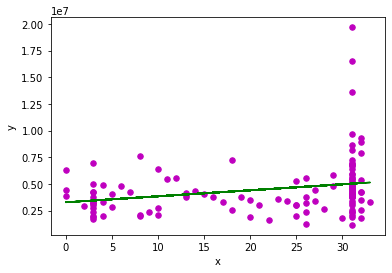

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main(X_trainm,y_trainm)

In [32]:
b0,b1 = estimate_coef(X_trainm,y_trainm)

In [33]:
# Linear model with the coefficients
def yhat(x):
  return b0 + x*b1

y_predm = yhat(X_testm)
y_predm

array([3441377.57664967, 3328588.92788954, 3723349.19855   ,
       3441377.57664967, 3441377.57664967, 5020418.65929153,
       4287292.44235067, 3441377.57664967, 3497771.90102974,
       5020418.65929153, 5020418.65929153, 4794841.36177127,
       4569264.064251  , 3723349.19855   ])

In [34]:
# Evaluating Metrics
Emetrics(y_testm,y_predm)

Mean Absoulute error is : 1317911.6717828193
Mean Squared error is: 2864740786546.9136
Root Mean Square error is: 1692554.5150886318
R2 score is: 0.21674231448101577


# 2.Taking OpenDate as the regressor

In [35]:
X = kdf.iloc[:, 1].values
y = kdf.iloc[:, -1].values

In [36]:
X

array([1999, 2008, 2013, 2012, 2009, 2010, 2010, 2011, 2010, 2011, 2013,
       2012, 2013, 2010, 2011, 2012, 2000, 2009, 2012, 2011, 2010, 2014,
       2006, 2009, 2009, 2011, 2010, 1999, 1998, 2006, 2008, 2012, 2009,
       2013, 2012, 1996, 2008, 2010, 2011, 2009, 2011, 2009, 2011, 2009,
       2004, 2012, 2011, 2009, 2011, 2008, 2010, 2011, 2013, 2013, 1999,
       2008, 2013, 2008, 2012, 2007, 2012, 2008, 2010, 2013, 1998, 2013,
       2010, 2011, 2010, 2011, 2006, 2006, 2009, 2011, 2011, 2005, 2008,
       2013, 2012, 2010, 2009, 2005, 2010, 1998, 2009, 2000, 2011, 2008,
       2013, 2009, 2013, 2007, 2002, 2012, 2011, 2012, 2011, 2009, 2011,
       1999, 2007, 2012, 2004, 2011, 2007, 2008, 2008, 2011, 2012, 2007,
       2012, 2012, 1998, 2006, 2008, 2012, 2012, 2005, 2009, 2014, 2011,
       2004, 1997, 2011, 2005, 2010, 2008, 2007, 2011, 2007, 2011, 2002,
       2008, 2006, 2006, 2010, 2009], dtype=object)

In [37]:
y

array([ 5653753.,  6923131.,  2055379.,  2675511.,  4316715.,  5017319.,
        5166635.,  4491607.,  4952497.,  5444227.,  3745135.,  5161370.,
        1734634.,  4807746.,  1999097.,  3218918., 19696939.,  8213524.,
        5337526.,  2021934.,  5525735.,  1149870.,  3956086.,  2999068.,
        8904084.,  3778621.,  2267425.,  5435276.,  4705945.,  3447890.,
        3008199.,  2058644.,  3261924.,  2371202.,  4100886.,  3903884.,
        3028267.,  2740687.,  5461700.,  3818055.,  6836483.,  4554237.,
        4952255.,  2732645.,  4264176.,  3752885.,  4250758.,  7865428.,
        7201784.,  8630682.,  2156098.,  3273041.,  1763231.,  5595267.,
        4651866.,  6941173.,  2390534.,  3258837.,  3004429.,  3600467.,
        3164972.,  4350573.,  5286212.,  1619683.,  2551252.,  1756069.,
        1882131.,  4052733.,  3836721.,  3452382.,  3982767.,  4136425.,
        2525375.,  3347767.,  5500818., 16549064.,  4590423.,  1904842.,
        3871344.,  6313221.,  3727364.,  4066618., 

In [38]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[ 5653753.],
       [ 6923131.],
       [ 2055379.],
       [ 2675511.],
       [ 4316715.],
       [ 5017319.],
       [ 5166635.],
       [ 4491607.],
       [ 4952497.],
       [ 5444227.],
       [ 3745135.],
       [ 5161370.],
       [ 1734634.],
       [ 4807746.],
       [ 1999097.],
       [ 3218918.],
       [19696939.],
       [ 8213524.],
       [ 5337526.],
       [ 2021934.],
       [ 5525735.],
       [ 1149870.],
       [ 3956086.],
       [ 2999068.],
       [ 8904084.],
       [ 3778621.],
       [ 2267425.],
       [ 5435276.],
       [ 4705945.],
       [ 3447890.],
       [ 3008199.],
       [ 2058644.],
       [ 3261924.],
       [ 2371202.],
       [ 4100886.],
       [ 3903884.],
       [ 3028267.],
       [ 2740687.],
       [ 5461700.],
       [ 3818055.],
       [ 6836483.],
       [ 4554237.],
       [ 4952255.],
       [ 2732645.],
       [ 4264176.],
       [ 3752885.],
       [ 4250758.],
       [ 7865428.],
       [ 7201784.],
       [ 8630682.],


In [39]:
# Train test split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = .1, random_state = 0)

Estimated coefficients:
b_0 = 451860529.0849781            
b_1 = -222704.91717337604


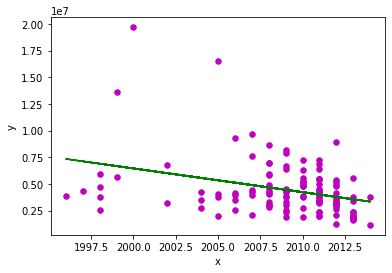

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main(X_trainm,y_trainm)

In [41]:
b0,b1 = estimate_coef(X_trainm,y_trainm)

In [42]:
# Linear model with the coefficients
def yhat(x):
  return b0 + x*b1

y_predm = yhat(X_testm)
y_predm

array([4223645.5664922595, 4223645.5664922595, 4000940.649318874,
       3778235.7321454883, 4446350.483665645, 6450694.7382259965,
       5114465.235185742, 4223645.5664922595, 3778235.7321454883,
       4446350.483665645, 4891760.318012357, 5114465.235185742,
       6673399.655399382, 6673399.655399382], dtype=object)

In [43]:
# Evaluating Metrics
Emetrics(y_testm,y_predm)

Mean Absoulute error is : 1533088.9697691244
Mean Squared error is: 3621196178753.134
Root Mean Square error is: 1902944.08187764
R2 score is: 0.0099174937222819


# Polynomial Regression

In [44]:
X = kdf.iloc[:, 0:-1].values
y = kdf.iloc[:, -1].values

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = kdf.iloc[:, 0:-1].values
y = kdf.iloc[:, -1].values

# Fit polynomial regression model
poly = PolynomialFeatures(degree=1) # set degree of polynomial
X_poly = poly.fit_transform(X) # create polynomial features
poly_reg = LinearRegression() # create linear regression model
poly_reg.fit(X_poly, y) # fit model on polynomial features

# Make predictions
y_pred = poly_reg.predict(X_poly)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 score: {r2}")

RMSE: 2883360.857951924
R^2 score: -0.26201291059427767


# Decision Tree Regression

In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = kdf.iloc[:, 0:-1].values
y = kdf.iloc[:, -1].values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5) # Set max_depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

Emetrics(y_test,y_pred)

Mean Absoulute error is : 1737753.1288690476
Mean Squared error is: 9635491083842.768
Root Mean Square error is: 3104108.7422709223
R2 score is: 0.21239659898291008


# Random Forest Regression

In [47]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = kdf.iloc[:, 0:-1].values
y = kdf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

Emetrics(y_test,y_pred)

Mean Absoulute error is : 1599992.8152380951
Mean Squared error is: 9145998664929.652
Root Mean Square error is: 3024235.219841481
R2 score is: -0.11135465067663941


#5) Specific to Random Forest Algorithm -
### a. Find the importance of each of the features and visualize them
### b. Build a new model by only taking the most important metrics
### c. Compare the results of both the models

# a)Feature Selection

Now we will do feature selection

In [48]:
# Train_Test_Split Method

X = kdf.iloc[:, 1:-1].values
y = kdf.iloc[:, -1].values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [51]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
print(X_train_fs) 
print(X_test_fs)
print(fs)

[[2012 31 0 ... 0.283553086146332 3.3201106550480426 1.615950825715222]
 [2011 8 1 ... -0.5926899093885737 -0.5325534825196172
  -0.6259252565428581]
 [2009 31 0 ... 0.5756340846579672 0.18982104327431898 0.4950127845861818]
 ...
 [2011 8 1 ... -0.5926899093885737 -0.5325534825196172
  -0.6259252565428581]
 [2002 31 0 ... -0.5926899093885737 -0.5325534825196172
  -0.6259252565428581]
 [2004 10 1 ... -0.5926899093885737 -0.5325534825196172
  -0.6259252565428581]]
[[2008 5 1 ... -0.5926899093885737 -0.5325534825196172
  -0.6259252565428581]
 [2007 0 1 ... 0.5756340846579672 0.18982104327431898 0.4950127845861818]
 [2013 3 0 ... -0.5926899093885737 -0.5325534825196172
  -0.6259252565428581]
 ...
 [1997 31 0 ... 0.283553086146332 3.3201106550480426 2.7368888668442617]
 [2012 27 1 ... 0.8677150831696024 0.6714040604702765 1.0554818051507018]
 [2004 3 0 ... 0.5756340846579672 0.18982104327431898 1.615950825715222]]
SelectKBest(k='all', score_func=<function f_regression at 0x7f2968b86430>)


In [52]:
import matplotlib.pyplot as plt

Feature 0: 8.006025
Feature 1: 4.286821
Feature 2: 5.929546
Feature 3: 0.002774
Feature 4: 1.721350
Feature 5: 4.487415
Feature 6: 0.136626
Feature 7: 0.687543
Feature 8: 0.573747
Feature 9: 1.620763
Feature 10: 0.581713
Feature 11: 0.310633
Feature 12: 0.077540
Feature 13: 0.026619
Feature 14: 2.003199
Feature 15: 0.439278
Feature 16: 0.175751
Feature 17: 0.487200
Feature 18: 0.298655
Feature 19: 0.007197
Feature 20: 2.660136
Feature 21: 0.003618
Feature 22: 1.224984
Feature 23: 0.162610
Feature 24: 7.580262
Feature 25: 5.194988
Feature 26: 1.543564
Feature 27: 0.473326
Feature 28: 1.181980
Feature 29: 0.224710
Feature 30: 0.034118
Feature 31: 6.507853
Feature 32: 1.172447
Feature 33: 0.412707
Feature 34: 0.004072
Feature 35: 0.201927
Feature 36: 0.103626
Feature 37: 0.376272
Feature 38: 0.000964
Feature 39: 0.061627
Feature 40: 0.013931


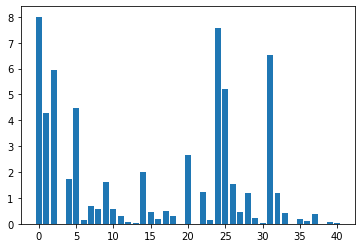

In [53]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [54]:
index1 = []
for i in range(0,len(fs.scores_)):
  if(fs.scores_[i]>=2):
    index1.append(i+1)
index1.append(len(column_names)-1)   # we are including the normlaized target column also 
index1

[1, 2, 3, 6, 15, 21, 25, 26, 32, 42]

# b. Building a new dataframe from important columns and applying Random Forest Algorithm

In [55]:
# Now our feature selected dataframe is ready
fit_kdf = kdf.iloc[:,index1]
fit_kdf

,Open Date,City,City Group,P2,P11,P17,P21,P22,P28,revenue
0,1999,31,0,0.391716,-0.138027,0.476215,-0.621025,0.630997,-0.531493,5653753.0
1,2008,3,0,0.391716,-1.188569,-0.512292,-0.621025,0.630997,-0.096779,6923131.0
2,2013,10,1,-0.270816,-0.663298,-0.512292,-0.621025,-1.000071,-0.966207,2055379.0
3,2012,28,1,0.060450,2.488326,0.970468,1.823814,-1.000071,-0.314136,2675511.0
4,2009,14,1,-0.270816,-0.663298,-0.018038,-0.621025,-0.184537,-0.966207,4316715.0
...,...,...,...,...,...,...,...,...,...,...
132,2008,29,1,-0.933348,0.387243,-0.512292,-0.132057,-1.000071,-0.531493,5787594.0
133,2006,32,0,0.391716,0.912514,-0.512292,-0.132057,-1.000071,-0.096779,9262754.0
134,2006,18,1,-0.270816,-1.188569,-0.512292,-0.621025,-0.184537,-0.531493,2544857.0
135,2010,31,0,0.391716,-0.663298,-0.512292,-0.621025,-1.000071,-0.096779,7217634.0


In [56]:
# Now our dataframe is ready with selected features and normalized data

# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = fit_kdf.iloc[:, 0:-1].values
y = fit_kdf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

## Evaluating the new model performance on Random Forest Algorithm 

In [57]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 1728408.197142857
Mean Squared error is: 8927183741086.193
Root Mean Square error is: 2987839.3097832743
R2 score is: -0.08476586664550223


# The R2 value for new model(Random Forest) is more than the previous dataframe i.e.

### New Model R2 is: -0.084 Vs Old Model R2 is: -0.111
### RMSE new Model is: 2987K Vs 3024K 

# Conculsion:
#### New model has little higher R2 value and less RMSE than old model. So new model in Random forest regression is slightly better than the old one!
